Solution path:
Class2: Time 1, Room RoomA, Instructor ProfB
Class1: Time 2, Room RoomB, Instructor ProfA
Class3: Time 2, Room RoomC, Instructor ProfC
Class4: Time 1, Room RoomB, Instructor ProfD


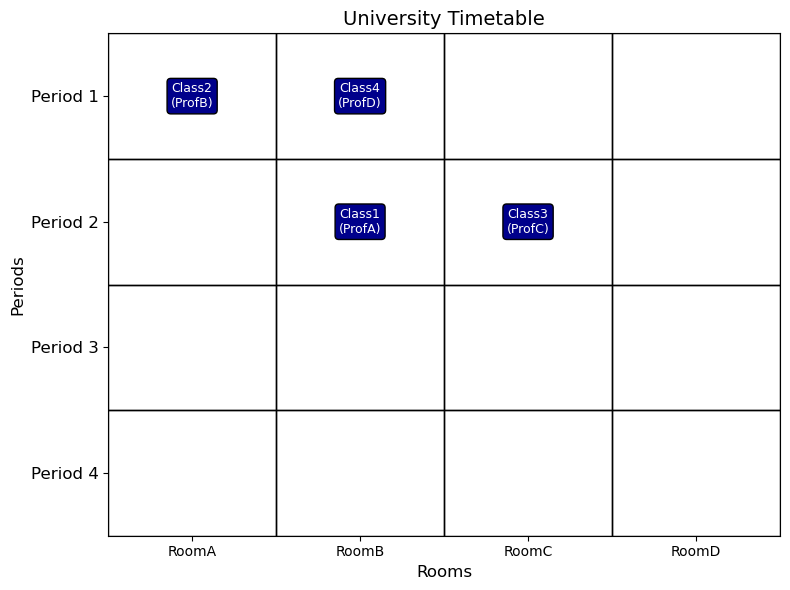

In [1]:
from collections import defaultdict
import matplotlib.pyplot as plt


class CSP:
    def __init__(self, variables, domains, constraints):
        self.variables = variables
        self.domains = domains
        self.constraints = constraints
        self.assignment = {}
        self.unassigned = set(variables)
        self.original_domains = {var: domains[var][:] for var in variables}


    def is_consistent(self, var, value):
        for constraint in self.constraints:
            if not constraint(var, value, self.assignment):
                return False
        return True


    def forward_checking(self, var, value):
        original_domains = {v: self.domains[v][:] for v in self.unassigned}
        self.assignment[var] = value
        self.unassigned.remove(var)


        for neighbor in self.unassigned:
            self.domains[neighbor] = [
                val for val in self.domains[neighbor] if self.is_consistent(neighbor, val)
            ]
            if not self.domains[neighbor]:
                self.assignment.pop(var)
                self.unassigned.add(var)
                self.domains = original_domains
                return False
        return True


    def select_unassigned_variable(self):
        return min(self.unassigned, key=lambda var: len(self.domains[var]))


    def backtracking_search(self):
        if len(self.assignment) == len(self.variables):
            return self.assignment


        var = self.select_unassigned_variable()
        for value in sorted(self.domains[var], key=lambda v: self.least_constraining_value(var, v)):
            if self.forward_checking(var, value):
                result = self.backtracking_search()
                if result:
                    return result
                self.assignment.pop(var)
                self.unassigned.add(var)
                self.domains[var] = self.original_domains[var][:]
        return None
    def least_constraining_value(self, var, value):
        return sum(
            len([val for val in self.domains[neighbor] if not self.is_consistent(neighbor, val)])
            for neighbor in self.unassigned
        )


    def visualize_timetable(self):
        if not self.assignment:
            print("No solution found to visualize.")
            return


        all_rooms = ['RoomA', 'RoomB', 'RoomC', 'RoomD']
        all_periods = [1, 2, 3, 4]


        timetable = defaultdict(lambda: defaultdict(str))
        for cls, (time, room, instructor) in self.assignment.items():
            timetable[time][room] = f"{cls}\n({instructor})"


        fig, ax = plt.subplots(figsize=(len(all_rooms) * 2, len(all_periods) * 1.5))
        ax.set_xticks(range(len(all_rooms)))
        ax.set_xticklabels(all_rooms, fontsize=10)
        ax.set_yticks(range(len(all_periods)))
        ax.set_yticklabels([f"Period {p}" for p in all_periods], fontsize=12)


        ax.set_xlim(-0.5, len(all_rooms) - 0.5)
        ax.set_ylim(-0.5, len(all_periods) - 0.5)
        ax.invert_yaxis()


        for i, period in enumerate(all_periods):
            for j, room in enumerate(all_rooms):
                if timetable[period][room]:
                    cls_info = timetable[period][room]
                    color = "darkblue"
                else:
                    cls_info = ""
                    color = "lightgray"


                ax.text(j, i, cls_info, ha="center", va="center", fontsize=9, color="white",
                        bbox=dict(boxstyle="round", facecolor=color, edgecolor="black"))
                ax.add_patch(plt.Rectangle((j - 0.5, i - 0.5), 1, 1, fill=None, edgecolor="black"))


        ax.set_title("University Timetable", fontsize=14)
        ax.set_xlabel("Rooms", fontsize=12)
        ax.set_ylabel("Periods", fontsize=12)
        plt.tight_layout()
        plt.show()




variables = ['Class1', 'Class2', 'Class3', 'Class4']
domains = {
    'Class1': [(1, 'RoomA', 'ProfA'), (2, 'RoomB', 'ProfA'), (3, 'RoomC', 'ProfA')],
    'Class2': [(1, 'RoomA', 'ProfB'), (2, 'RoomD', 'ProfB'), (3, 'RoomB', 'ProfB')],
    'Class3': [(1, 'RoomA', 'ProfC'), (2, 'RoomC', 'ProfC'), (3, 'RoomD', 'ProfC')],
    'Class4': [(1, 'RoomB', 'ProfD'), (2, 'RoomC', 'ProfD'), (3, 'RoomA', 'ProfD')]
}


constraints = [
    lambda var, value, assignment: all(
        value[1] != assignment[other][1] or value[0] != assignment[other][0]
        for other in assignment if other != var
    ),
    lambda var, value, assignment: all(
        value[0] != assignment[other][0] or value[2] != assignment[other][2]
        for other in assignment if other != var
    )
]
csp = CSP(variables, domains, constraints)
solution = csp.backtracking_search()


if solution:
    print("Solution path:")
    for cls, schedule in solution.items():
        print(f"{cls}: Time {schedule[0]}, Room {schedule[1]}, Instructor {schedule[2]}")
else:
    print("No solution found")
csp.visualize_timetable()
